In [35]:
import numpy as np
import sympy as sp
from IPython.display import display
s mpl
mpl.rcParams["figure.dpi"] = 24
import matplotlib.0pyplot as plt
import pandas as pdsp.init_printing()
pp

SyntaxError: invalid syntax (<ipython-input-35-c58372c56f1b>, line 3)

In [36]:
L0 = 14959789200000.0 # 1 code unit of length in centimeter
v0 = 1e5 # 1 code unit of velocity in cm/s
t0 = L0/v0 # 1 code unit of time in seconds
mpl.rcParams["figure.dpi"] = 240

In [37]:
def radius(img):
    domainsize = len(img)
    background_prs = img[0,0]
    wave_position = np.zeros(domainsize)
    center_line = img[domainsize//2]
    wave  = center_line > background_prs*1.01
    j = 0
    while not wave[j]:
        j += 1
    return domainsize//2 - j

In [38]:
R = np.zeros(80)
t = np.zeros(80)
for i in range(80):
    frame = pp.pload(i, "../pluto-definitions/blastwave-lowpress/mu0/")
    R[i] = radius(frame.prs)*frame.dx1[0]
    t[i] = frame.SimTime

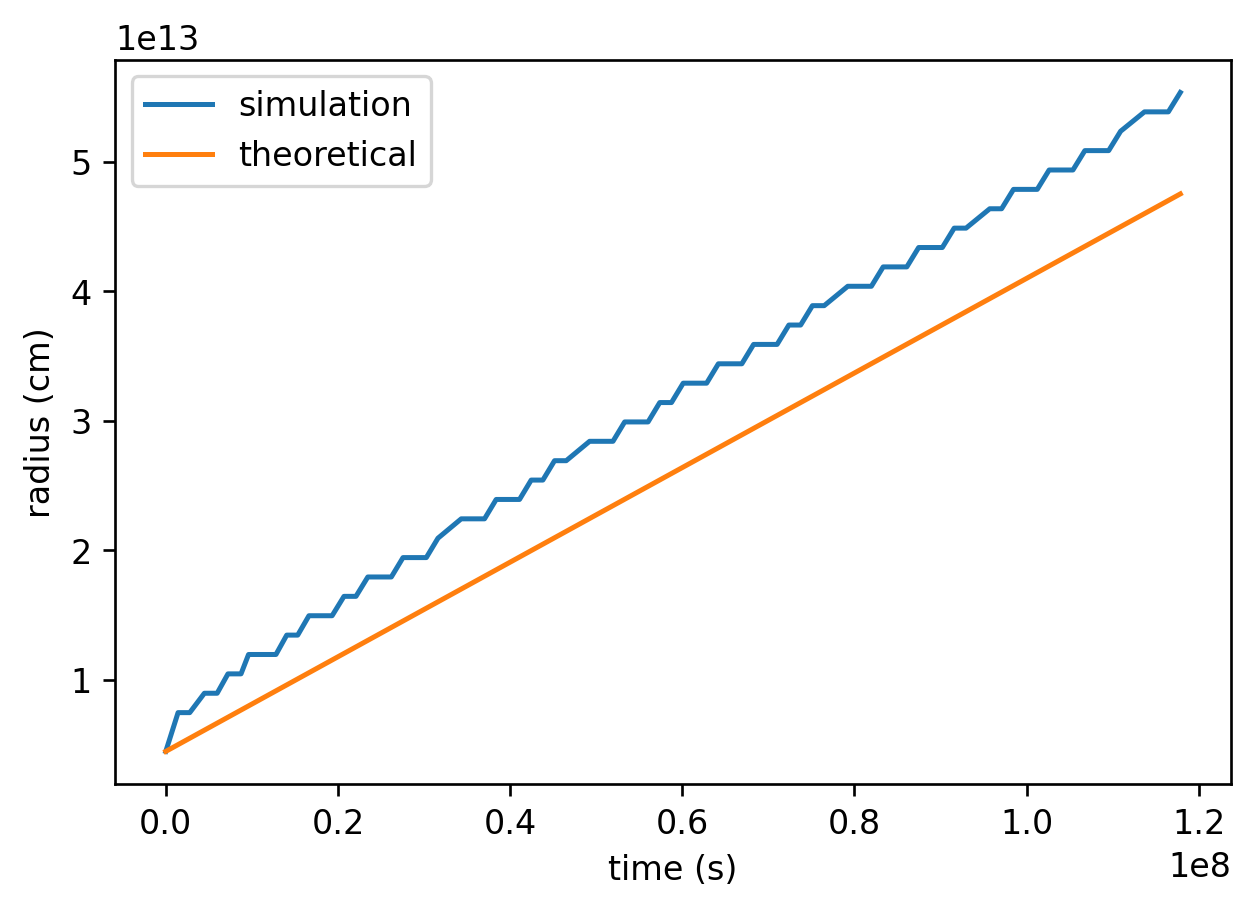

In [39]:
plt.plot(t*t0, R*L0, label = "simulation")
plt.xlabel("time (s)")
plt.ylabel("radius (cm)")
plt.plot(t*t0, (np.sqrt(5/3*8) *t + 0.3)*L0, label = "theoretical")
plt.legend()

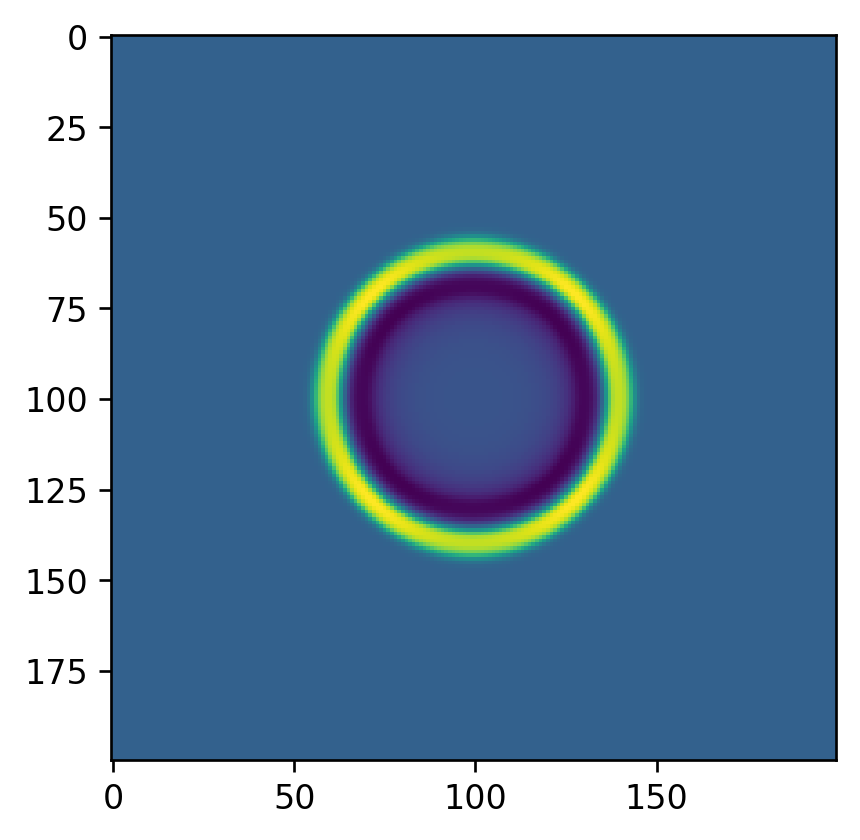

In [40]:
i = 100
frame = pp.pload(i, "../pluto-definitions/blastwave-lowpress/mu0/")
plt.imshow(frame.prs)

# Non linear effects

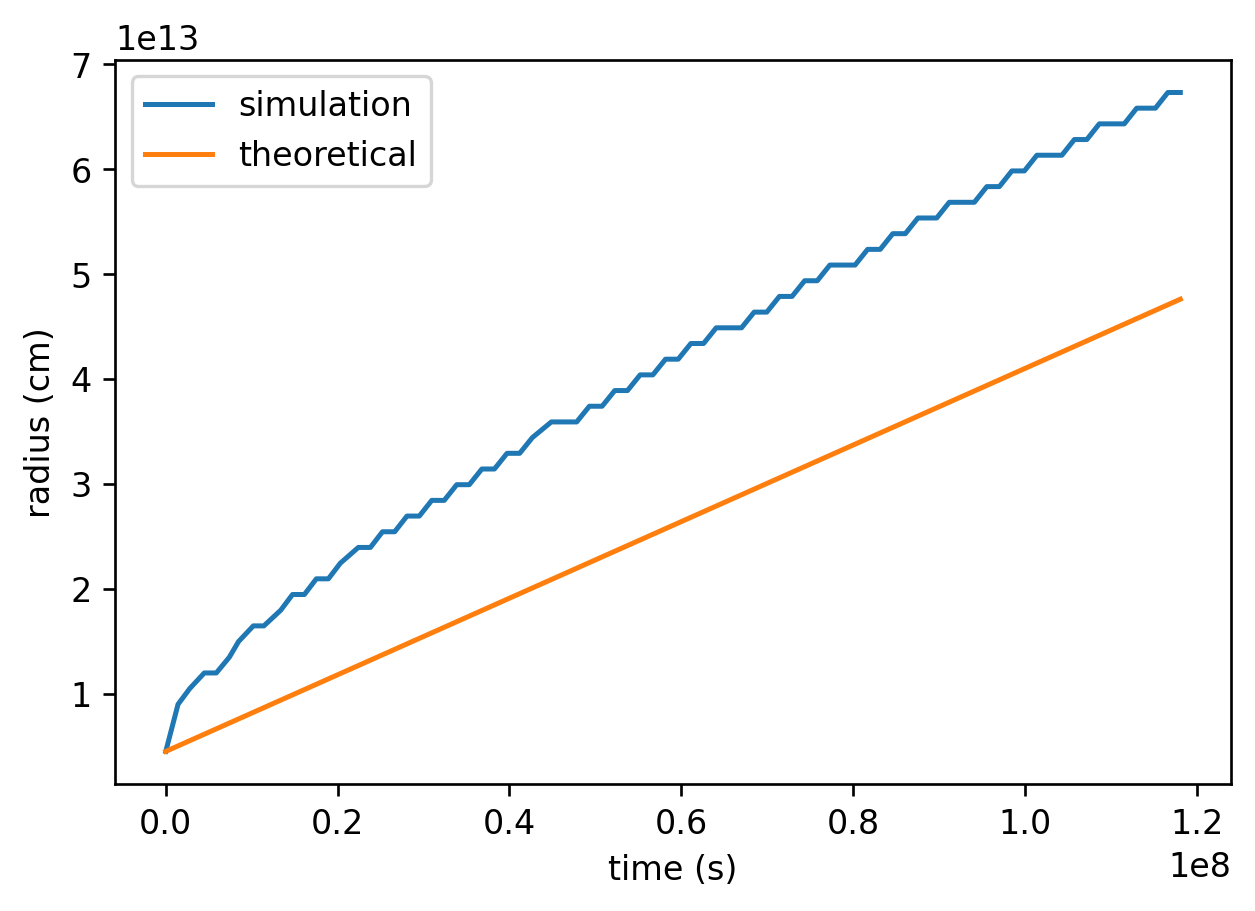

In [43]:
R = np.zeros(80)
t = np.zeros(80)
for i in range(80):
    frame = pp.pload(i, "../pluto-definitions/blastwave-lowpress/mu0_hp/")
    R[i] = radius(frame.prs)*frame.dx1[0]
    t[i] = frame.SimTime
plt.xlabel("time (s)")
plt.ylabel("radius (cm)")
plt.plot(t*t0, R*L0, label = "simulation")
plt.plot(t*t0, (np.sqrt(5/3*8) *t + 0.3)*L0, label = "theoretical")
plt.legend()
plt.savefig("../report/figures/non_linear_effects.pdf")